In [1]:
import numpy as np
import astropy.io.fits as fits
import astropy.units as u
from IPython.display import clear_output
import time
import sys
from scipy.ndimage import rotate
from scipy.interpolate import RegularGridInterpolator
import h5py
import os
from pathlib import Path

from matplotlib.patches import Circle
from importlib import reload
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
from numpy import unravel_index
from photutils.aperture import CircularAperture
from photutils.aperture import ApertureStats

In [2]:
main_dir='/Users/polaris/Onedrive-UA/OneDrive - University of Arizona/Debris-Disk-Modelling/Debris-Disk-Modelling/Eps-eri-Roman_pol/Simulations_paper/HLC_band_analog/'
dust='Carbon/'
disk_file_dir=main_dir+dust
med_wd_noNMF_0=fits.getdata(disk_file_dir+'med_wd_I0.fits')
med_wd_noNMF_90=fits.getdata(disk_file_dir+'med_wd_I90.fits')
med_wd_noNMF_45=fits.getdata(disk_file_dir+'med_wd_I45.fits')
med_wd_noNMF_135=fits.getdata(disk_file_dir+'med_wd_I135.fits')


positions = [(34., 51.), (18., 45.),(50., 38.)]
aper = CircularAperture(positions, r=5.)

aperstats = ApertureStats(med_wd_noNMF_0, aper)
noise_noNMF_0=np.mean(aperstats.std)
SNR_0=med_wd_noNMF_0.astype(np.float64)/noise_noNMF_0

aperstats = ApertureStats(med_wd_noNMF_90, aper)
noise_noNMF_90=np.mean(aperstats.std)
SNR_90=med_wd_noNMF_90.astype(np.float64)/noise_noNMF_90

aperstats = ApertureStats(med_wd_noNMF_45, aper)
noise_noNMF_45=np.mean(aperstats.std)
SNR_45=med_wd_noNMF_45.astype(np.float64)/noise_noNMF_45

aperstats = ApertureStats(med_wd_noNMF_135, aper)
noise_noNMF_135=np.mean(aperstats.std)
SNR_135=med_wd_noNMF_135.astype(np.float64)/noise_noNMF_135

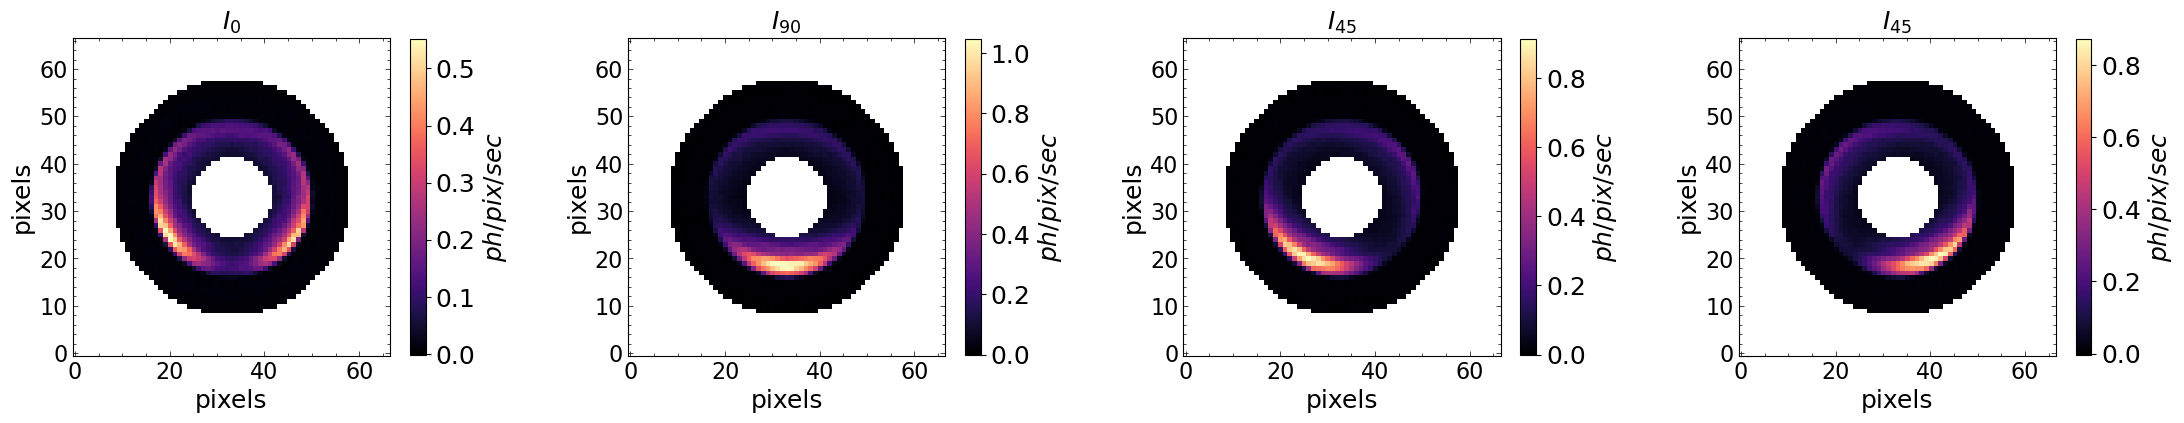

In [3]:
fig = plt.figure(figsize=(25, 10))
ax1=fig.add_subplot(141)
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
ax1.minorticks_on()
ax1.tick_params(which='both', direction='in', width=0.5, labelsize=16)
im1=ax1.imshow(med_wd_noNMF_0,cmap='magma')
ax1.invert_yaxis()
ax1.set_ylabel('pixels',fontsize=18)
ax1.set_xlabel('pixels',fontsize=18)
ax1.set_title('$I_0$',fontsize=18)
cb = fig.colorbar(im1,orientation='vertical',shrink=0.4)
cb.set_label("$ph/pix/sec$",fontsize=18)
cb.ax.tick_params(labelsize=18)

ax2=fig.add_subplot(142)
ax2.yaxis.set_ticks_position('both')
ax2.xaxis.set_ticks_position('both')
ax2.minorticks_on()
ax2.tick_params(which='both', direction='in', width=0.5, labelsize=16)
im2=ax2.imshow(med_wd_noNMF_90,cmap='magma')
ax2.invert_yaxis()
ax2.set_ylabel('pixels',fontsize=18)
ax2.set_xlabel('pixels',fontsize=18)
ax2.set_title('$I_{90}$',fontsize=18)
cb = fig.colorbar(im2,orientation='vertical',shrink=0.4)
cb.set_label("$ph/pix/sec$",fontsize=18)
cb.ax.tick_params(labelsize=18)
        
ax3=fig.add_subplot(143)
ax3.yaxis.set_ticks_position('both')
ax3.xaxis.set_ticks_position('both')
ax3.minorticks_on()
ax3.tick_params(which='both', direction='in', width=0.5, labelsize=16)
im3=ax3.imshow(med_wd_noNMF_45,cmap='magma')
ax3.invert_yaxis()
ax3.set_ylabel('pixels',fontsize=18)
ax3.set_xlabel('pixels',fontsize=18)
ax3.set_title('$I_{45}$',fontsize=18)
cb = fig.colorbar(im3,orientation='vertical',shrink=0.4)
cb.set_label("$ph/pix/sec$",fontsize=18)
cb.ax.tick_params(labelsize=18)

ax4=fig.add_subplot(144)
ax4.yaxis.set_ticks_position('both')
ax4.xaxis.set_ticks_position('both')
ax4.minorticks_on()
ax4.tick_params(which='both', direction='in', width=0.5, labelsize=16)
im4=ax4.imshow(med_wd_noNMF_135,cmap='magma')
ax4.invert_yaxis()
ax4.set_ylabel('pixels',fontsize=18)
ax4.set_xlabel('pixels',fontsize=18)
ax4.set_title('$I_{45}$',fontsize=18)
cb = fig.colorbar(im4,orientation='vertical',shrink=0.4)
cb.set_label("$ph/pix/sec$",fontsize=18)
cb.ax.tick_params(labelsize=18)
fig.subplots_adjust(hspace=0.1, wspace=0.4, top=0.9, right=0.95)
#fig.savefig(disk_file_dir+'photon_counted_disks.pdf', format='pdf', bbox_inches='tight')

In [4]:
positions = [(34., 51.), (18., 45.),(50., 38.)]
aper = CircularAperture(positions, r=5.)

aperstats = ApertureStats(med_wd_noNMF_0, aper)
noise_noNMF_0=np.mean(aperstats.std)
SNR_0=med_wd_noNMF_0.astype(np.float64)/noise_noNMF_0

aperstats = ApertureStats(med_wd_noNMF_90, aper)
noise_noNMF_90=np.mean(aperstats.std)
SNR_90=med_wd_noNMF_90.astype(np.float64)/noise_noNMF_90

aperstats = ApertureStats(med_wd_noNMF_45, aper)
noise_noNMF_45=np.mean(aperstats.std)
SNR_45=med_wd_noNMF_45.astype(np.float64)/noise_noNMF_45

aperstats = ApertureStats(med_wd_noNMF_135, aper)
noise_noNMF_135=np.mean(aperstats.std)
SNR_135=med_wd_noNMF_135.astype(np.float64)/noise_noNMF_135

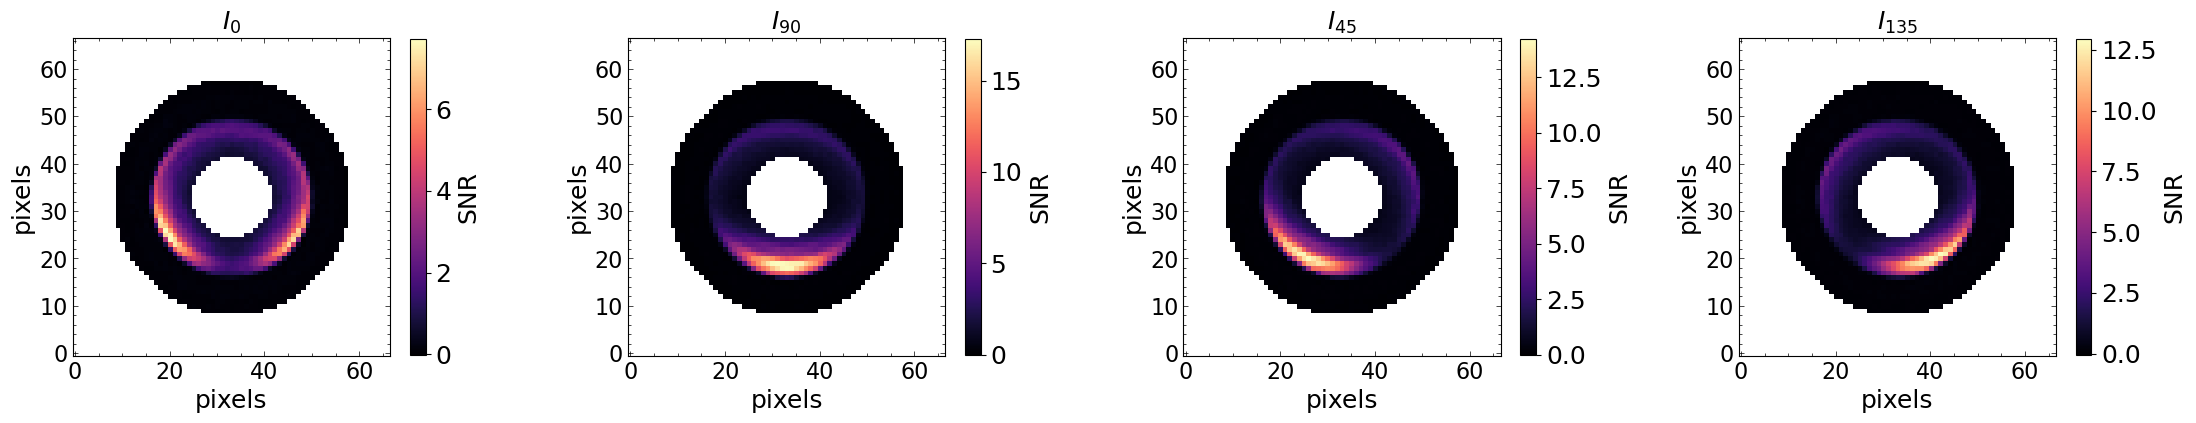

In [5]:
fig = plt.figure(figsize=(25, 10))
ax1=fig.add_subplot(141)
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
ax1.minorticks_on()
ax1.tick_params(which='both', direction='in', width=0.5, labelsize=16)
im1=ax1.imshow(SNR_0,cmap='magma')
ax1.invert_yaxis()
ax1.set_ylabel('pixels',fontsize=18)
ax1.set_xlabel('pixels',fontsize=18)
ax1.set_title('$I_0$',fontsize=18)
cb = fig.colorbar(im1,orientation='vertical',shrink=0.4)
cb.set_label("SNR",fontsize=18)
cb.ax.tick_params(labelsize=18)

ax2=fig.add_subplot(142)
ax2.yaxis.set_ticks_position('both')
ax2.xaxis.set_ticks_position('both')
ax2.minorticks_on()
ax2.tick_params(which='both', direction='in', width=0.5, labelsize=16)
im2=ax2.imshow(SNR_90,cmap='magma')
ax2.invert_yaxis()
ax2.set_ylabel('pixels',fontsize=18)
ax2.set_xlabel('pixels',fontsize=18)
ax2.set_title('$I_{90}$',fontsize=18)
cb = fig.colorbar(im2,orientation='vertical',shrink=0.4)
cb.set_label("SNR",fontsize=18)
cb.ax.tick_params(labelsize=18)
        
ax3=fig.add_subplot(143)
ax3.yaxis.set_ticks_position('both')
ax3.xaxis.set_ticks_position('both')
ax3.minorticks_on()
ax3.tick_params(which='both', direction='in', width=0.5, labelsize=16)
im3=ax3.imshow(SNR_45,cmap='magma')
ax3.invert_yaxis()
ax3.set_ylabel('pixels',fontsize=18)
ax3.set_xlabel('pixels',fontsize=18)
ax3.set_title('$I_{45}$',fontsize=18)
cb = fig.colorbar(im3,orientation='vertical',shrink=0.4)
cb.set_label("SNR",fontsize=18)
cb.ax.tick_params(labelsize=18)

ax4=fig.add_subplot(144)
ax4.yaxis.set_ticks_position('both')
ax4.xaxis.set_ticks_position('both')
ax4.minorticks_on()
ax4.tick_params(which='both', direction='in', width=0.5, labelsize=16)
im4=ax4.imshow(SNR_135,cmap='magma')
ax4.invert_yaxis()
ax4.set_ylabel('pixels',fontsize=18)
ax4.set_xlabel('pixels',fontsize=18)
ax4.set_title('$I_{135}$',fontsize=18)
cb = fig.colorbar(im4,orientation='vertical',shrink=0.4)
cb.set_label("SNR",fontsize=18)
cb.ax.tick_params(labelsize=18)
    
fig.subplots_adjust(hspace=0.1, wspace=0.4, top=0.9, right=0.95)
#fig.savefig(disk_file_dir+'SNR_disks_NMF.pdf', format='pdf', bbox_inches='tight')

In [6]:
Q_out=(med_wd_noNMF_0.astype(np.float64)-med_wd_noNMF_90.astype(np.float64))
U_out=(med_wd_noNMF_45.astype(np.float64)-med_wd_noNMF_135.astype(np.float64))
I_out=(med_wd_noNMF_0.astype(np.float64)+med_wd_noNMF_90.astype(np.float64))


Q_out[np.isnan(Q_out)]=0
U_out[np.isnan(U_out)]=0
I_out[np.isnan(I_out)]=0


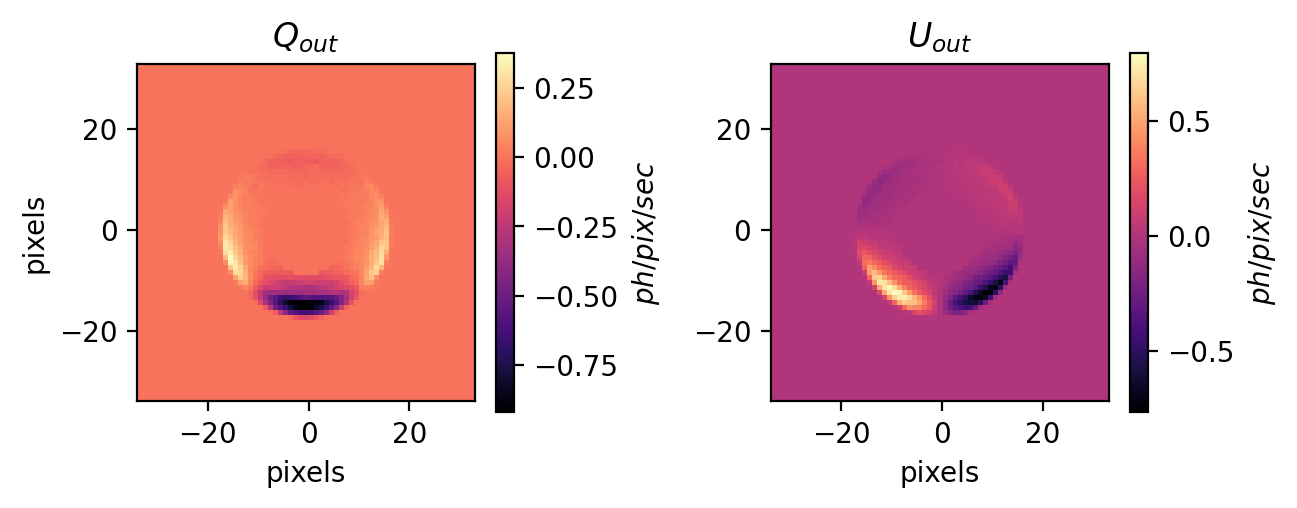

In [7]:
px=67
psf_scale=0.02184 ##arcsecs/pixel
xpix=(np.arange (-px+33, px-33, 1))
ypix=(np.arange (-px+33, px-33, 1))

fig = plt.figure(dpi=200)
ax1=fig.add_subplot(121)
im1=ax1.imshow(Q_out,cmap='magma',extent=[np.min(ypix),np.max(ypix),np.max(xpix),np.min(xpix)])
ax1.invert_yaxis()
ax1.set_ylabel('pixels')
ax1.set_xlabel('pixels')
ax1.set_title('$Q_{out}$', fontsize=12)
cb = fig.colorbar(im1,orientation='vertical',shrink=0.42)
cb.set_label('$ph/pix/sec$')
ax1.grid(False)

ax2=fig.add_subplot(122)
im2=ax2.imshow(U_out,cmap='magma',extent=[np.min(ypix),np.max(ypix),np.max(xpix),np.min(xpix)])
ax2.invert_yaxis()
#ax2.set_ylabel('pixels')
ax2.set_xlabel('pixels')
ax2.set_title('$U_{out}$',fontsize=12)
cb = fig.colorbar(im2,orientation='vertical',shrink=0.42)
cb.set_label('$ph/pix/sec$')
ax2.grid(False)

fig.subplots_adjust(hspace=0.9, wspace=0.5, top=1, right=0.95)
#fig.savefig(disk_file_dir+'Stokes_output.pdf', format='pdf', bbox_inches='tight')

In [8]:
np.seterr(invalid='ignore')
xarc=(np.arange (-px+33, px-34, 1))*psf_scale
yarc=(np.arange (-px+34, px-34, 1))*psf_scale
sq_as_per_pix=psf_scale**2
A=2.5*np.log10(sq_as_per_pix)
C=17.339273083333335  

X, Y = np.mgrid[(0):(67):67j, (0):(67):67j]
positions = np.vstack([X.ravel(), Y.ravel()])
pos=np.transpose(positions)

Phi=np.arctan((pos[:,0]-33)/(pos[:,1]-34))
Phi_new=np.reshape(Phi,(67,67))

Q_cor=0.99*Q_out+0.99e-06*U_out
U_cor=0.994758322*U_out


Q_phi=Q_cor*np.cos(2*Phi_new)+U_cor*np.sin(2*Phi_new)
U_phi=-Q_cor*np.sin(2*Phi_new)+U_cor*np.cos(2*Phi_new)

# calculating instrumental magnitudes -2.5log10(ct/s)+ZP+2.5log10(Area)
Q_mag=-2.5*np.log10(Q_phi)+C+A
U_mag=-2.5*np.log10(U_phi)+C+A
I_mag=-2.5*np.log10(I_out)+C+A

# calculating flux
Q_flux=10**(-0.4*Q_mag)*10**3
U_flux=10**(-0.4*U_mag)*10**3
I_flux=10**(-0.4*I_mag)*10**3



p_r=np.abs(Q_flux/I_flux)
theta=0.5*np.arctan2(U_out,Q_out)


Q_flux[np.isnan(Q_flux)]=0
U_flux[np.isnan(U_flux)]=0
p_r[np.isnan(p_r)]=0
I_flux[np.isnan(I_flux)]=0
theta[np.isnan(theta)]=0
#p_r[p_r>0.4]=0
np.max(p_r)


/var/folders/tz/b2jsht6d7nv7db1v7bt3645c0000gn/T/ipykernel_57803/2686772590.py:23: RuntimeWarning: divide by zero encountered in log10
  Q_mag=-2.5*np.log10(Q_phi)+C+A
/var/folders/tz/b2jsht6d7nv7db1v7bt3645c0000gn/T/ipykernel_57803/2686772590.py:24: RuntimeWarning: divide by zero encountered in log10
  U_mag=-2.5*np.log10(U_phi)+C+A
/var/folders/tz/b2jsht6d7nv7db1v7bt3645c0000gn/T/ipykernel_57803/2686772590.py:25: RuntimeWarning: divide by zero encountered in log10
  I_mag=-2.5*np.log10(I_out)+C+A


0.8246058729994746

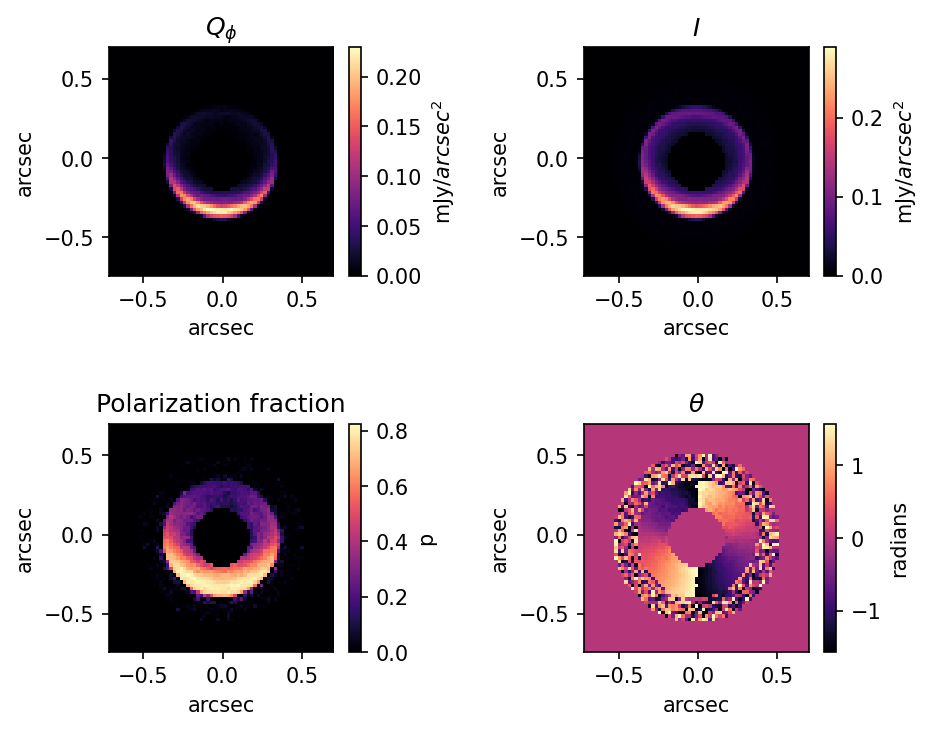

In [9]:
fig = plt.figure(dpi=150)
ax1=fig.add_subplot(221)
im1=ax1.imshow(Q_flux,cmap='magma',extent=[np.min(yarc),np.max(yarc),np.max(xarc),np.min(xarc)])
ax1.invert_yaxis()
ax1.set_ylabel('arcsec')
ax1.set_xlabel('arcsec')
ax1.set_title(r'$Q_{\phi}$')
cb = fig.colorbar(im1,orientation='vertical')
cb.set_label(u"mJy/$arcsec^2$")
ax1.grid(False)

ax2=fig.add_subplot(222)
im2=ax2.imshow(I_flux,cmap='magma',extent=[np.min(yarc),np.max(yarc),np.max(xarc),np.min(xarc)])
ax2.invert_yaxis()
ax2.set_ylabel('arcsec')
ax2.set_xlabel('arcsec')
ax2.set_title(r'$I$')
cb = fig.colorbar(im2,orientation='vertical')
cb.set_label(u"mJy/$arcsec^2$")
ax2.grid(False)

ax2=fig.add_subplot(223)
im2=ax2.imshow(p_r,cmap='magma',extent=[np.min(yarc),np.max(yarc),np.max(xarc),np.min(xarc)])
ax2.invert_yaxis()
ax2.set_ylabel('arcsec')
ax2.set_xlabel('arcsec')
ax2.set_title('Polarization fraction')
cb = fig.colorbar(im2,orientation='vertical')
cb.set_label('p')
ax2.grid(False)

ax2=fig.add_subplot(224)
im2=ax2.imshow(theta,cmap='magma',extent=[np.min(yarc),np.max(yarc),np.max(xarc),np.min(xarc)])
ax2.invert_yaxis()
ax2.set_ylabel('arcsec')
ax2.set_xlabel('arcsec')
ax2.set_title(r'$\theta$')
cb = fig.colorbar(im2,orientation='vertical')
cb.set_label('radians')
ax2.grid(False)
fig.subplots_adjust(hspace=0.65, wspace=0.5, top=0.95, right=0.95)
fig.savefig(disk_file_dir+'Final_Stokes_carbon.pdf', format='pdf', bbox_inches='tight')

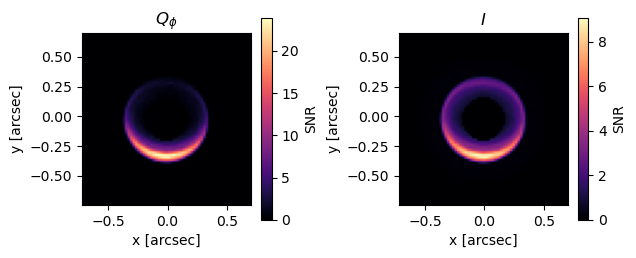

In [10]:
positions = [(34., 51.), (18., 45.),(50., 38.)]
aper = CircularAperture(positions, r=5.)

aperstats = ApertureStats(Q_flux, aper)
noise_Q=np.mean(aperstats.std)
SNR_Q=Q_flux.astype(np.float64)/noise_Q

aperstats = ApertureStats(I_flux, aper)
noise_I=np.mean(aperstats.std)
SNR_I=I_flux.astype(np.float64)/noise_I

fig = plt.figure(dpi=100)
ax1=fig.add_subplot(121)
im1=ax1.imshow(SNR_Q,cmap='magma',extent=[np.min(yarc),np.max(yarc),np.max(xarc),np.min(xarc)])
ax1.invert_yaxis()
ax1.set_ylabel('y [arcsec]')
ax1.set_xlabel('x [arcsec]')
ax1.set_title(r'$Q_{\phi}$')
cb = fig.colorbar(im1,orientation='vertical',shrink=0.5)
cb.set_label('SNR')
ax1.grid(False)

ax2=fig.add_subplot(122)
im2=ax2.imshow(SNR_I,cmap='magma',extent=[np.min(yarc),np.max(yarc),np.max(xarc),np.min(xarc)])
ax2.invert_yaxis()
ax2.set_ylabel('y [arcsec]')
ax2.set_xlabel('x [arcsec]')
ax2.set_title(r'$I$')
cb = fig.colorbar(im2,orientation='vertical',shrink=0.5)
cb.set_label('SNR')
ax2.grid(False)
fig.subplots_adjust(hspace=0.65, wspace=0.5, top=0.95, right=0.95)

In [955]:
hdu = fits.PrimaryHDU(I_flux.astype(np.float64))
hdul = fits.HDUList([hdu])
hdul.writeto(disk_file_dir+'I_flux_band.fits',overwrite=True)
hdu = fits.PrimaryHDU(Q_flux.astype(np.float64))
hdul = fits.HDUList([hdu])
hdul.writeto(disk_file_dir+'Q_flux_band.fits',overwrite=True)
hdu = fits.PrimaryHDU(U_flux.astype(np.float64))
hdul = fits.HDUList([hdu])
hdul.writeto(disk_file_dir+'U_flux_band.fits',overwrite=True)
hdu = fits.PrimaryHDU(p_r.astype(np.float64))
hdul = fits.HDUList([hdu])
hdul.writeto(disk_file_dir+'pout_band.fits',overwrite=True)

In [11]:
y, x = np.indices(Q_flux.shape)     # 0.0665AU/pixel
center = np.array([(x.max()-x.min())/2.0, (y.max()-y.min())/2.0])
qx, qy=np.unravel_index(np.argmax(Q_flux), Q_flux.shape)
ix, iy=np.unravel_index(np.argmax(I_flux), I_flux.shape)
prx, pry =np.unravel_index(np.argmax(p_r), p_r.shape)
        
npix=1
        
Q_flux_lin=np.mean(Q_flux[qx-npix:qx+npix,:],axis=0)
I_flux_lin=np.mean(I_flux[qx-npix:qx+npix,:],axis=0)
p_r_lin   =np.mean(p_r[prx-npix:prx+npix,:],axis=0)

Q_flux_err=np.mean(np.std(Q_flux[qx-npix:qx+npix,:],axis=0))
I_flux_err=np.mean(np.std(I_flux[qx-npix:qx+npix,:],axis=0))
p_r_err  =np.mean(np.std(p_r[qx-npix:qx+npix,:],axis=0))

In [12]:
np.max(p_r_lin)

0.8116806608480035

In [13]:
p_r_err

0.022661666664059228

In [14]:
np.max(Q_flux)

0.22952045694792841

In [15]:
Q_flux_err

0.007272027493980682

In [16]:
np.max(I_flux_lin)

0.27931898509675834

In [17]:
np.max(I_flux)

0.28925833240708765

In [24]:
qx, qy=np.unravel_index(np.argmax(Q_flux), Q_flux.shape)
q_max=Q_flux[qx-1:qx+2,qy-1:qy+2]
i_max=I_flux[qx-1:qx+2,qy-1:qy+2]

In [25]:
q_max

array([[0.12156615, 0.12557287, 0.13314388],
       [0.13743516, 0.1383729 , 0.13729408],
       [0.10630888, 0.09816543, 0.08829075]])

In [26]:
p_r_lin=p_r[prx:prx+3,pry-1:pry+1]
p_r_lin

array([[0.        , 0.39876575],
       [0.        , 0.        ],
       [0.        , 0.        ]])

In [959]:
np.mean(p_r_lin)

0.7202104876916214

In [960]:
np.std(p_r_lin)

0.023637932425602633